<a href="https://colab.research.google.com/github/knight19720208ui/AI/blob/main/S3Clases_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# Leer datos financieros desde Yahoo Finance
#
import yfinance as yf
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("YahooFinanceExample").getOrCreate()

# Descargar datos en tiempo real de Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, period='1d', interval='1m')

# Convertir los datos a un DataFrame de Spark
spark_df = spark.createDataFrame(data.reset_index())

# Mostrar los datos
spark_df.show()

# Detener la sesión de Spark
spark.stop()


[*********************100%***********************]  1 of 1 completed


+-------------------+---------------------+------------------+------------------+------------------+------------------+------------------+
|   ('Datetime', '')|('Adj Close', 'AAPL')| ('Close', 'AAPL')|  ('High', 'AAPL')|   ('Low', 'AAPL')|  ('Open', 'AAPL')|('Volume', 'AAPL')|
+-------------------+---------------------+------------------+------------------+------------------+------------------+------------------+
|2025-01-03 14:30:00|    242.8802032470703| 242.8802032470703|243.39999389648438| 242.3000030517578| 243.3699951171875|           1827199|
|2025-01-03 14:31:00|    242.4477996826172| 242.4477996826172|243.07000732421875|242.37680053710938|             243.0|            193609|
|2025-01-03 14:32:00|   242.50010681152344|242.50010681152344| 242.8000030517578|242.22000122070312| 242.5399932861328|            244754|
|2025-01-03 14:33:00|   242.92869567871094|242.92869567871094|243.13099670410156|242.58999633789062|242.60960388183594|            135414|
|2025-01-03 14:34:00|      

In [ ]:
#
# Lectura simulada de: tráfico vehicular 01
#
import time
import random
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, col

# Crear una sesión de Spark
spark = SparkSession.builder.appName("TrafficDataExample").getOrCreate()

# Función para generar datos de tráfico simulados
def generate_traffic_data():
    return [(int(time.time()), random.randint(0, 100), random.choice(['Car', 'Truck', 'Motorcycle']))]

# Crear un DataFrame de Spark con datos simulados
schema = "timestamp LONG, speed INT, vehicle_type STRING"
traffic_data = spark.createDataFrame([], schema)

# Simular la lectura de datos en tiempo real
for _ in range(10):
    new_data = generate_traffic_data()
    new_df = spark.createDataFrame(new_data, schema)
    traffic_data = traffic_data.union(new_df)
    time.sleep(1)  # Esperar 1 segundo antes de generar nuevos datos

# Convertir el timestamp a un formato legible
traffic_data = traffic_data.withColumn("timestamp", from_unixtime(col("timestamp")))

# Mostrar los datos
traffic_data.show()

# Detener la sesión de Spark
spark.stop()


+-------------------+-----+------------+
|          timestamp|speed|vehicle_type|
+-------------------+-----+------------+
|2025-01-04 01:04:47|    2|       Truck|
|2025-01-04 01:04:48|   35|       Truck|
|2025-01-04 01:04:49|   54|       Truck|
|2025-01-04 01:04:50|   46|  Motorcycle|
|2025-01-04 01:04:51|   87|         Car|
|2025-01-04 01:04:52|    5|         Car|
|2025-01-04 01:04:53|   91|       Truck|
|2025-01-04 01:04:54|   59|         Car|
|2025-01-04 01:04:55|   85|       Truck|
|2025-01-04 01:04:56|   76|       Truck|
+-------------------+-----+------------+



In [ ]:
#
# Lectura de: tráfico vehicular 02
#

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import requests
import pandas as pd
import io

# Crear una sesión de Spark
spark = SparkSession.builder.appName("TrafficDataStreaming").getOrCreate()

# Definir la ruta del archivo CSV
traffic_data_path = "https://data.cityofnewyork.us/resource/9s4h-4j5b.csv"

#
##
###
# Define the schema
schema = StructType([
    StructField("date_time", TimestampType(), True),
    StructField("borough", StringType(), True),
    StructField("zip_code", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("location", StringType(), True),
    StructField("on_street_name", StringType(), True),
    StructField("cross_street_name", StringType(), True),
    StructField("off_street_name", StringType(), True),
    StructField("number_of_persons_injured", IntegerType(), True),
    StructField("number_of_persons_killed", IntegerType(), True),
    StructField("number_of_pedestrians_injured", IntegerType(), True),
    StructField("number_of_pedestrians_killed", IntegerType(), True),
    StructField("number_of_cyclist_injured", IntegerType(), True),
    StructField("number_of_cyclist_killed", IntegerType(), True),
    StructField("number_of_motorist_injured", IntegerType(), True),
    StructField("number_of_motorist_killed", IntegerType(), True),
    StructField("contributing_factor_vehicle_1", StringType(), True),
    StructField("contributing_factor_vehicle_2", StringType(), True),
    StructField("contributing_factor_vehicle_3", StringType(), True),
    StructField("contributing_factor_vehicle_4", StringType(), True),
    StructField("contributing_factor_vehicle_5", StringType(), True),
    StructField("unique_key", IntegerType(), True),
    StructField("vehicle_type_code1", StringType(), True),
    StructField("vehicle_type_code2", StringType(), True),
    StructField("vehicle_type_code_3", StringType(), True),
    StructField("vehicle_type_code_4", StringType(), True),
    StructField("vehicle_type_code_5", StringType(), True),
])
###
##
#

# Download the CSV data from the URL
response = requests.get(traffic_data_path)
# Check if the request was successful
if response.status_code == 200:
    csv_data = response.content.decode('utf-8')

    # Read the CSV data into a Pandas DataFrame
    pandas_df = pd.read_csv(io.StringIO(csv_data))

    # Convert the Pandas DataFrame to a Spark DataFrame
    traffic_stream = spark.createDataFrame(pandas_df, schema=schema)
else:
    print(f"Error downloading data: Status code {response.status_code}")
    # Handle the error, e.g., exit or use a default DataFrame
    traffic_stream = spark.createDataFrame([], schema=schema)  # Create an empty DataFrame



# Procesar los datos (por ejemplo, contar vehículos por tipo)
# Since this is not a streaming DataFrame, we can use regular DataFrame operations
vehicle_count = traffic_stream.groupBy("vehicle_type_code1").count()  # Changed "vehicle_type" to "vehicle_type_code1"


# Mostrar los resultados
vehicle_count.show()

# Detener la sesión de Spark
spark.stop()

Error downloading data: Status code 404
+------------------+-----+
|vehicle_type_code1|count|
+------------------+-----+
+------------------+-----+



# Usando Spark

In [ ]:
!pip install pandas pyspark folium ipywidgets


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_unixtime, col, date_format
import folium

# Función para generar coordenadas aleatorias dentro de Quito
def generate_random_coordinates():
    # Coordenadas aproximadas de Quito
    lat_min, lat_max = -0.35, -0.05
    lon_min, lon_max = -78.65, -78.35

    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)

    return lat, lon

# Función para generar datos de accidentes de tránsito
def generate_accident_data(start_time, end_time, interval_minutes):
    current_time = start_time
    data = []

    while current_time <= end_time:
        # Añadir aleatoriedad dentro del intervalo de 7 minutos
        random_offset = timedelta(minutes=random.uniform(0, interval_minutes))
        accident_time = current_time + random_offset

        lat, lon = generate_random_coordinates()
        accident_data = {
            'timestamp': accident_time,
            'latitude': lat,
            'longitude': lon,
            'vehicle_type': random.choice(['Car', 'Truck', 'Motorcycle']),
            'people_affected': random.randint(1, 10)
        }
        data.append(accident_data)
        current_time += timedelta(minutes=interval_minutes)

    return data

# Parámetros de simulación
start_time = datetime(2024, 12, 1, 0, 0, 0)
end_time = datetime(2025, 1, 4, 13, 0, 0)
interval_minutes = 7

# Generar datos de accidentes de tránsito
accident_data = generate_accident_data(start_time, end_time, interval_minutes)

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(accident_data)

# Guardar los datos en un archivo CSV
df.to_csv('accident_data_quito.csv', index=False)

# Crear una sesión de Spark
spark = SparkSession.builder.appName("AccidentDataQuitoExample").getOrCreate()

# Leer los datos desde el archivo CSV
spark_df = spark.read.csv('accident_data_quito.csv', header=True, inferSchema=True)


# Convertir el timestamp a un formato legible
spark_df = spark_df.withColumn("timestamp", date_format(col("timestamp"), "yyyy-MM-dd HH:mm:ss")) # Format existing timestamp

# Mostrar los datos
spark_df.show()

# Detener la sesión de Spark
spark.stop()

print("Datos de accidentes de tránsito generados y procesados con Apache Spark")

# Crear un mapa de Quito
map_quito = folium.Map(location=[-0.22985, -78.52495], zoom_start=12)

# Añadir marcadores de accidentes al mapa
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Accidente: {row['timestamp']}\nTipo de vehículo: {row['vehicle_type']}\nPersonas afectadas: {row['people_affected']}"
    ).add_to(map_quito)

# Guardar el mapa en un archivo HTML
map_quito.save('accident_map_quito.html')

print("Mapa de accidentes de tránsito guardado en 'accident_map_quito.html'")


+-------------------+--------------------+------------------+------------+---------------+
|          timestamp|            latitude|         longitude|vehicle_type|people_affected|
+-------------------+--------------------+------------------+------------+---------------+
|2024-12-01 00:05:54|-0.25347000958597354|-78.53565925497443|         Car|              3|
|2024-12-01 00:07:34| -0.2583677320455302|-78.47453403448304|         Car|             10|
|2024-12-01 00:14:49|-0.15449376888313063|-78.38904679138786|  Motorcycle|              6|
|2024-12-01 00:26:14| -0.3187948556524381|-78.61320378737793|       Truck|              9|
|2024-12-01 00:32:35|-0.30025759816271513|-78.49466002625175|  Motorcycle|              3|
|2024-12-01 00:36:52|-0.10636200142348623|-78.43810179213666|  Motorcycle|              5|
|2024-12-01 00:42:17| -0.1304269266737464|-78.43224765246337|         Car|              6|
|2024-12-01 00:52:21|-0.15049866447150462| -78.4434774843601|  Motorcycle|              6|

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta
import folium
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display

# Función para generar coordenadas aleatorias dentro de Quito
def generate_random_coordinates():
    # Coordenadas aproximadas de Quito
    lat_min, lat_max = -0.35, -0.05
    lon_min, lon_max = -78.65, -78.35

    lat = random.uniform(lat_min, lat_max)
    lon = random.uniform(lon_min, lon_max)

    return lat, lon

# Función para generar datos de accidentes de tránsito
def generate_accident_data(start_time, end_time, interval_minutes):
    current_time = start_time
    data = []

    while current_time <= end_time:
        # Añadir aleatoriedad dentro del intervalo de 7 minutos
        random_offset = timedelta(minutes=random.uniform(0, interval_minutes))
        accident_time = current_time + random_offset

        lat, lon = generate_random_coordinates()
        accident_data = {
            'timestamp': accident_time,
            'latitude': lat,
            'longitude': lon,
            'vehicle_type': random.choice(['Car', 'Truck', 'Motorcycle']),
            'people_affected': random.randint(1, 10)
        }
        data.append(accident_data)
        current_time += timedelta(minutes=interval_minutes)

    return data

# Parámetros de simulación
start_time = datetime(2024, 12, 1, 0, 0, 0)
end_time = datetime(2025, 1, 4, 13, 0, 0)
interval_minutes = 7

# Generar datos de accidentes de tránsito
accident_data = generate_accident_data(start_time, end_time, interval_minutes)

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(accident_data)

# Guardar los datos en un archivo CSV
df.to_csv('accident_data_quito.csv', index=False)

print("Datos de accidentes de tránsito generados y guardados en 'accident_data_quito.csv'")

# Crear un mapa de Quito
map_quito = folium.Map(location=[-0.22985, -78.52495], zoom_start=12)

# Añadir marcadores de accidentes al mapa
marker_cluster = MarkerCluster().add_to(map_quito)

# Function to update the map
def update_map(start_date, end_date, lat_min, lat_max, lon_min, lon_max):
    # Filtrar los datos por fecha y zona
    filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date) &
                     (df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
                     (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]

    # Remove existing marker cluster from map
    # This effectively removes all markers
    # Instead of iterating through _children, directly remove the marker_cluster
    if marker_cluster in map_quito._children.values():
        map_quito.remove_child(marker_cluster)

    # Recreate the marker cluster to start fresh
    marker_cluster = MarkerCluster().add_to(map_quito)

    # Añadir marcadores de accidentes filtrados al mapa
    for _, row in filtered_df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Accidente: {row['timestamp']}\nTipo de vehículo: {row['vehicle_type']}\nPersonas afectadas: {row['people_affected']}"
        ).add_to(marker_cluster)

# Controles interactivos
start_date_widget = widgets.DatePicker(description='Fecha Inicio', value=start_time.date())
end_date_widget = widgets.DatePicker(description='Fecha Fin', value=end_time.date())
lat_min_widget = widgets.FloatSlider(value=-0.35, min=-0.35, max=-0.05, step=0.01, description='Lat Min')
lat_max_widget = widgets.FloatSlider(value=-0.05, min=-0.35, max=-0.05, step=0.01, description='Lat Max')
lon_min_widget = widgets.FloatSlider(value=-78.65, min=-78.65, max=-78.35, step=0.01, description='Lon Min')
lon_max_widget = widgets.FloatSlider(value=-78.35, min=-78.65, max=-78.35, step=0.01, description='Lon Max')

# Función para actualizar el mapa cuando cambian los controles
def on_widget_change(change):
    start_date = datetime.combine(start_date_widget.value, datetime.min.time())
    end_date = datetime.combine(end_date_widget.value, datetime.max.time())
    update_map(start_date, end_date, lat_min_widget.value, lat_max_widget.value, lon_min_widget.value, lon_max_widget.value)

# Observar cambios en los controles
start_date_widget.observe(on_widget_change, names='value')
end_date_widget.observe(on_widget_change, names='value')
lat_min_widget.observe(on_widget_change, names='value')
lat_max_widget.observe(on_widget_change, names='value')
lon_min_widget.observe(on_widget_change, names='value')
lon_max_widget.observe(on_widget_change, names='value')

# Mostrar los controles y el mapa
display(start_date_widget, end_date_widget, lat_min_widget, lat_max_widget, lon_min_widget, lon_max_widget)
display(map_quito)

# Actualizar el mapa inicialmente
on_widget_change(None)


Datos de accidentes de tránsito generados y guardados en 'accident_data_quito.csv'


DatePicker(value=datetime.date(2024, 12, 1), description='Fecha Inicio')

DatePicker(value=datetime.date(2025, 1, 4), description='Fecha Fin')

FloatSlider(value=-0.35, description='Lat Min', max=-0.05, min=-0.35, step=0.01)

FloatSlider(value=-0.05, description='Lat Max', max=-0.05, min=-0.35, step=0.01)

FloatSlider(value=-78.65, description='Lon Min', max=-78.35, min=-78.65, step=0.01)

FloatSlider(value=-78.35, description='Lon Max', max=-78.35, min=-78.65, step=0.01)

UnboundLocalError: local variable 'marker_cluster' referenced before assignment

In [ ]:
!!pip install pytrends

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list=['Big Data', 'Python'])
datos = pytrends.interest_over_time()
print(datos)

            Big Data  Python  isPartial
date                                   
2019-12-29         2      45      False
2020-01-05         2      60      False
2020-01-12         2      64      False
2020-01-19         2      68      False
2020-01-26         2      67      False
...              ...     ...        ...
2024-12-01         2      76      False
2024-12-08         2      75      False
2024-12-15         2      67      False
2024-12-22         1      51      False
2024-12-29         1      48       True

[262 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GoogleTrendsAnalysis") \
    .getOrCreate()

df = spark.createDataFrame(datos.reset_index())
df.show()

+-------------------+--------+------+---------+
|               date|Big Data|Python|isPartial|
+-------------------+--------+------+---------+
|2019-12-29 00:00:00|       2|    45|    false|
|2020-01-05 00:00:00|       2|    60|    false|
|2020-01-12 00:00:00|       2|    64|    false|
|2020-01-19 00:00:00|       2|    68|    false|
|2020-01-26 00:00:00|       2|    67|    false|
|2020-02-02 00:00:00|       2|    66|    false|
|2020-02-09 00:00:00|       3|    71|    false|
|2020-02-16 00:00:00|       3|    72|    false|
|2020-02-23 00:00:00|       3|    70|    false|
|2020-03-01 00:00:00|       3|    68|    false|
|2020-03-08 00:00:00|       2|    66|    false|
|2020-03-15 00:00:00|       2|    61|    false|
|2020-03-22 00:00:00|       2|    63|    false|
|2020-03-29 00:00:00|       2|    67|    false|
|2020-04-05 00:00:00|       2|    64|    false|
|2020-04-12 00:00:00|       2|    67|    false|
|2020-04-19 00:00:00|       2|    71|    false|
|2020-04-26 00:00:00|       2|    66|   

In [ ]:
from pytrends.request import TrendReq
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 1. Configurar pytrends y obtener datos de Google Trends
pytrends = TrendReq(hl='en-US', tz=360)  # Configura el idioma y la zona horaria
pytrends.build_payload(kw_list=['Big Data', 'Python', 'Ecuador','Violencia'])  # Define el término de búsqueda

# Obtener datos de interés a lo largo del tiempo
datos_trends = pytrends.interest_over_time()

# 2. Crear una sesión de Spark
spark = SparkSession.builder \
    .appName("GoogleTrendsLastNRows") \
    .getOrCreate()

# Convertir los datos de Google Trends en un DataFrame de Spark
df_trends = spark.createDataFrame(datos_trends.reset_index())

# 3. Mostrar las últimas N filas
N = 30  # Número de filas finales que deseas ver

# Ordenar el DataFrame por fecha en orden descendente y limitar a N filas
df_ultimas_n_filas = df_trends.orderBy(col("date").desc()).limit(N)

# Mostrar el resultado
print(f"Mostrando las últimas {N} filas:")
df_ultimas_n_filas.show(truncate=False)

/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Mostrando las últimas 30 filas:
+-------------------+--------+------+-------+---------+---------+
|date               |Big Data|Python|Ecuador|Violencia|isPartial|
+-------------------+--------+------+-------+---------+---------+
|2024-12-29 00:00:00|1       |25    |9      |1        |true     |
|2024-12-22 00:00:00|1       |25    |8      |1        |false    |
|2024-12-15 00:00:00|1       |33    |10     |1        |false    |
|2024-12-08 00:00:00|1       |37    |11     |2        |false    |
|2024-12-01 00:00:00|1       |38    |11     |3        |false    |
|2024-11-24 00:00:00|1       |35    |12     |5        |false    |
|2024-11-17 00:00:00|1       |36    |27     |4        |false    |
|2024-11-10 00:00:00|1       |37    |20     |3        |false    |
|2024-11-03 00:00:00|1       |35    |12     |3        |false    |
|2024-10-27 00:00:00|1       |33    |11     |3        |false    |
|2024-10-20 00:00:00|1       |39    |12     |3        |false    |
|2024-10-13 00:00:00|1       |37    |21     

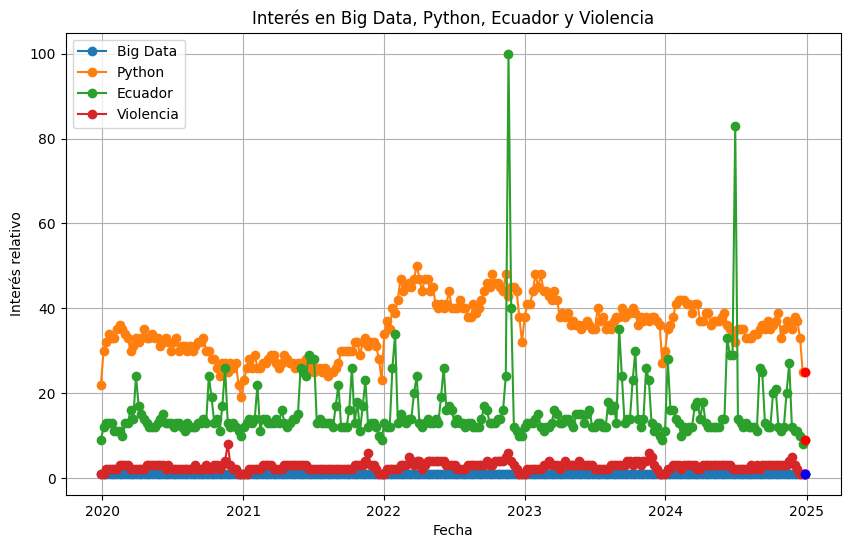

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Convertir a Pandas DataFrame
pdf = df_trends.toPandas()  # Convert to Pandas DataFrame

# Graficar
plt.figure(figsize=(10, 6))

# Graficar cada término usando el Pandas DataFrame
plt.plot(pdf["date"], pdf["Big Data"], label="Big Data", marker="o")
plt.plot(pdf["date"], pdf["Python"], label="Python", marker="o")
plt.plot(pdf["date"], pdf["Ecuador"], label="Ecuador", marker="o")
plt.plot(pdf["date"], pdf["Violencia"], label="Violencia", marker="o")

# Resaltar datos parciales
for i, row in pdf.iterrows():  # Iterate through the Pandas DataFrame
    if row["isPartial"]:
        plt.scatter(row["date"], row["Big Data"], color="red", zorder=5)
        plt.scatter(row["date"], row["Python"], color="red", zorder=5)
        plt.scatter(row["date"], row["Ecuador"], color="red", zorder=5)
        plt.scatter(row["date"], row["Violencia"], color="blue", zorder=5)

# Añadir etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Interés relativo")
plt.title("Interés en Big Data, Python, Ecuador y Violencia")
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
